`cd project/seniorthesis/notebooks`

`conda list PyCO2SYS`

`pip install PyCO2SYS`

`mamba update cmip6_preprocessing -y`

In [1]:
import cmip6_preprocessing
cmip6_preprocessing.__version__

'0.5.1.dev1+g4ef7105'

In [13]:
import xarray as xr
from cmip6_preprocessing.preprocessing import combined_preprocessing
import PyCO2SYS as pyco2 # i have to install this package through terminal for it to work
import intake
import matplotlib.pyplot as plt
import numpy as np
import warnings
import gsw
from cmip6_preprocessing.postprocessing import combine_datasets
from cartopy import crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import cmocean
import matplotlib.path as mpath
from cmip6_preprocessing.postprocessing import merge_variables

In [14]:
col = intake.open_esm_datastore("https://storage.googleapis.com/cmip6/pangeo-cmip6.json")

In [15]:
def pick_first_member(ds_list, **kwargs):
    return ds_list[0]

variables = ['dissic','talk', 'so', 'thetao']
z_kwargs = {'consolidated': True, 'use_cftime': True}
query = dict(experiment_id=['historical'], 
             table_id=['Omon'], 
             variable_id=variables,
             grid_label=['gr'],
              source_id=['GFDL-ESM4', 'CESM2-WACCM', 'CESM2', 
                         'CESM2-FV2', 'NorESM2-LM', 'MRI-ESM2-0', 
                         'GFDL-CM4', 'CESM2-WACCM-FV2']
            )


cat = col.search(**query)

# print(cat.df['source_id'].unique())
dset_dict_old = cat.to_dataset_dict(zarr_kwargs=z_kwargs, storage_options={'token': 'anon'},
                                preprocess=combined_preprocessing, aggregate=False)

# variables = ['thetao', 'so', 'talk', 'dissic']
# z_kwargs = {'consolidated': True, 'use_cftime': True}
# query = dict(experiment_id=['historical'], table_id=['Omon'], 
#              variable_id=variables,
#              grid_label=['gr'],
#              source_id=['E3SM-1-0', 'E3SM-1-1', 'GFDL-ESM4',
#                         'CESM2-FV2','CESM2','MRI-ESM2-0',
#                         'CESM2-WACCM-FV2','GFDL-CM4','CESM2-WACCM',
#                         'E3SM-1-1-ECA'])


# cat = col.search(**query)

# dset_dict_old = cat.to_dataset_dict(zarr_kwargs=z_kwargs, storage_options={'token': 'anon'},
#                                 preprocess=combined_preprocessing, aggregate=False)



--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.member_id.table_id.variable_id.grid_label.zstore.dcpp_init_year.version'


In [16]:
dd_new = merge_variables(dset_dict_old)
# dd_new

/srv/conda/envs/notebook/lib/python3.8/site-packages/cmip6_preprocessing/postprocessing.py:138: UserWarning: CMIP.NCAR.CESM2-FV2.historical.r2i1p1f1.Omon.gr.none.so failed to combine with :indexes along dimension 'time' are not equal
  warnings.warn(f"{cmip6_dataset_id(ds)} failed to combine with :{e}")
/srv/conda/envs/notebook/lib/python3.8/site-packages/cmip6_preprocessing/postprocessing.py:138: UserWarning: CMIP.NCAR.CESM2-WACCM-FV2.historical.r3i1p1f1.Omon.gr.none.thetao failed to combine with :indexes along dimension 'time' are not equal
  warnings.warn(f"{cmip6_dataset_id(ds)} failed to combine with :{e}")
/srv/conda/envs/notebook/lib/python3.8/site-packages/cmip6_preprocessing/postprocessing.py:138: UserWarning: CMIP.NCAR.CESM2.historical.r10i1p1f1.Omon.gr.none.dissic failed to combine with :indexes along dimension 'time' are not equal
  warnings.warn(f"{cmip6_dataset_id(ds)} failed to combine with :{e}")
/srv/conda/envs/notebook/lib/python3.8/site-packages/cmip6_preprocessing/p

In [17]:
temp={}
for name,item in dd_new.items():
    #print(name)
    #print(item.data_vars)
    present = item.data_vars
    if all(i in present for i in variables):
        #print(name)
        temp[name]=item
dd_new = temp
list(dd_new.keys())

['CESM2.gr.historical.Omon.r4i1p1f1',
 'CESM2.gr.historical.Omon.r7i1p1f1',
 'CESM2-WACCM.gr.historical.Omon.r1i1p1f1',
 'NorESM2-LM.gr.historical.Omon.r1i1p1f1',
 'GFDL-CM4.gr.historical.Omon.r1i1p1f1',
 'CESM2-WACCM.gr.historical.Omon.r3i1p1f1',
 'CESM2.gr.historical.Omon.r9i1p1f1',
 'CESM2.gr.historical.Omon.r5i1p1f1',
 'CESM2.gr.historical.Omon.r6i1p1f1',
 'CESM2.gr.historical.Omon.r3i1p1f1',
 'CESM2-FV2.gr.historical.Omon.r1i1p1f1',
 'CESM2-WACCM-FV2.gr.historical.Omon.r1i1p1f1',
 'CESM2.gr.historical.Omon.r11i1p1f1',
 'GFDL-ESM4.gr.historical.Omon.r1i1p1f1',
 'CESM2.gr.historical.Omon.r2i1p1f1',
 'CESM2-WACCM.gr.historical.Omon.r2i1p1f1',
 'CESM2.gr.historical.Omon.r1i1p1f1',
 'MRI-ESM2-0.gr.historical.Omon.r1i2p1f1',
 'CESM2.gr.historical.Omon.r8i1p1f1']

In [18]:
dd_new_new = combine_datasets(
    dd_new,
    pick_first_member,
    match_attrs=['source_id', 'grid_label', 'experiment_id', 'table_id']
)
list(dd_new_new.keys())

['CESM2.gr.historical.Omon',
 'CESM2-WACCM.gr.historical.Omon',
 'NorESM2-LM.gr.historical.Omon',
 'GFDL-CM4.gr.historical.Omon',
 'CESM2-FV2.gr.historical.Omon',
 'CESM2-WACCM-FV2.gr.historical.Omon',
 'GFDL-ESM4.gr.historical.Omon',
 'MRI-ESM2-0.gr.historical.Omon']

In [7]:
list(dd_new_new.keys())

['CESM2-WACCM-FV2.gr.historical.Omon',
 'CESM2-WACCM.gr.historical.Omon',
 'GFDL-ESM4.gr.historical.Omon',
 'CESM2.gr.historical.Omon',
 'GFDL-CM4.gr.historical.Omon',
 'MRI-ESM2-0.gr.historical.Omon',
 'CESM2-FV2.gr.historical.Omon',
 'NorESM2-LM.gr.historical.Omon']

### Error in aggregation for 3 models
> `'E3SM-1-1'`

> `'E3SM-1-0'`

> `'NorCPM1'`

`results = pyco2.sys(par1=None, par2=None, par1_type=None, par2_type=None, **kwargs)`

### Arguments

`par1` and `par2`: values of two different carbonate system parameters.

`par1_type` and `par2_type`: which types of parameter par1 and par2 are.


Total alkalinity (type `1`) in μmol·kg−1.
> <font color='red'>alkalinity in CMIP6 is in mol/m3 </font> 

Dissolved inorganic carbon (type `2`) in μmol·kg−1.
> <font color='red'>DIC in CMIP6 is in mol/m3 </font> 

pH (type `3`) on the Total, Seawater, Free or NBS scale1. Which scale is given by the argument opt_pH_scale.

Partial pressure of CO2 (type `4`) in μatm, Fugacity of CO2 (type `5`) in μatm, Aqueous CO2 (type `8`) in μmol·kg−1, or Dry mole fraction of CO2 (type `9`) in ppm.

Carbonate ion (type `6`) in μmol·kg−1.

Bicarbonate ion (type `7`) in μmol·kg−1.

### Kwargs/hydrographic conditions

`salinity`: practical salinity (dimensionless).

`temperature`: temperature at which `par1` and `par2` arguments are provided in °C (default 25 °C).
> <font color='red'>in situ temp </font> 
> `gsw.t_from_CT(SA, CT, p)`

`pressure`: water pressure at which `par1` and `par2` arguments are provided in dbar (default 0 dbar).
> pressure_in will be related to depth

> `gsw.p_from_z(z, lat, geo_strf_dyn_height=0, sea_surface_geopotential=0)` = dbar

> > Parameters

> > > zarray-like: Depth, positive up, m

> > > latarray-like: Latitude, -90 to 90 degrees

> > > geo_strf_dyn_heightarray-like

> > > > dynamic height anomaly, m^2/s^2

> > > > Note that the reference pressure, p_ref, of geo_strf_dyn_height must be zero (0) dbar.

> > > sea_surface_geopotentialarray-like

> > > > geopotential at zero sea pressure, m^2/s^2

> > Returns

> > > parray-like, dbar

> > > > sea pressure ( i.e. absolute pressure - 10.1325 dbar )


`temperature_out`: temperature at which results will be calculated in °C ("output conditions").
> <font color='red'>temperature_out = thetao (potential temp) </font> 

`pressure_out`: water pressure at which results will be calculated in dbar ("output conditions").
> <font color='red'>pressure out should be 0 since raised to surface </font> 

### Results (non-exhaustive but some that looked relevant)

`"dic"`: dissolved inorganic carbon in μmol·kg−1.

`"aqueous_CO2"/"aqueous_CO2_out"`: aqueous CO2 at input/output conditions in μmol·kg−1.

`"pCO2"/"pCO2_out"`: seawater partial pressure of CO2 at input/output conditions in μatm.

`"alkalinity"`: total alkalinity in μmol·kg−1.

`"pH"/"pH_out"`: pH at input/output conditions on the scale specified by input opt_pH_scale.

`"pH_total"/"pH_total_out"`: pH at input/output conditions on the Total scale.

#### convert potential temperature to conservative temperature


In [19]:

def calc_PpCO2_graeme(ds):
    results = pyco2.sys(par1=ds['talk']*1035.0,par2=ds['dissic']*1035.0,par1_type=1,par2_type=2,
                        pressure=0)
    return ds['talk'].copy(data=results['pCO2'])

def calc_PpCO2(ds):
    p = gsw.p_from_z(-1*ds['lev'], ds['y'], geo_strf_dyn_height=0, sea_surface_geopotential=0)
    insitutemp = gsw.t_from_CT(ds['so'], ds['thetao'], p)  # 0 is just a filler rn 
    conversion =  1e6/1035
    results = pyco2.sys(par1=ds.talk*conversion,par2=ds.dissic*conversion,par1_type=1,par2_type=2,
                        pressure_out=0, temperature_out = ds.thetao, pressure = p, 
                        temperature = insitutemp)
    return ds['talk'].copy(data=results['pCO2_out'])

def meridionalsection(ax,da,clims=None,title=None):
    im = ax.pcolormesh(da['y'],da['lev'],da)
    if clims is not None:
        im.set_clim(clims)
    ax.set_xlim([-80,60])
    ax.invert_yaxis()
    cbar = plt.colorbar(im,ax=ax)
    cbar.set_label('Seawater Partial Pressure of CO2 (\u03BCatm)')
    ax.set_title(title)
    
def calc_sigma2(ds):
    return gsw.sigma2(ds['so'],ds['thetao'])

def meridionalsection_with_sigma2(ax,da,sigma2,clims=None,title=None):
    meridionalsection(ax,da,clims)
    ax.contour(da['y'],da['lev'],sigma2,levels=[36,36.4,36.8],colors='w')
    ax.set_title(title)
    
def draw_SOcustom(X,Y,Z,cmap,cbar_label,title,plot_type,**kwargs):
    
    crs_plot = ccrs.SouthPolarStereo()
    crs_source = ccrs.PlateCarree()
    
    fig,ax = plt.subplots(figsize=(10,10),subplot_kw={'projection':crs_plot})
    ax.add_feature(cfeature.LAND,zorder=10,facecolor='darkgray')
    ax.set_extent([-180, 180, -90, -30], crs_source)
    # Compute a circle in axes coordinates, which we can use as a boundary
    # for the map. We can pan/zoom as much as we like - the boundary will be
    # permanently circular.
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    ax.set_boundary(circle, transform=ax.transAxes)
    
    ax.gridlines()
    ax.coastlines()
    
    ax.set_title(title,fontsize=14,pad = 20)
    
    if plot_type == 'contourf':
        im = ax.contourf(X,Y,Z,kwargs['clevs'],cmap=cmap,transform=crs_source)
    elif plot_type == 'pcolormesh':
        im = ax.pcolormesh(X,Y,Z,cmap=cmap,transform=crs_source,vmin=kwargs['clims'][0],vmax=kwargs['clims'][1])
    
    cbar = plt.colorbar(im,orientation='horizontal',fraction=0.025,pad=0.05)
    cbar.set_label(cbar_label,fontsize=12)
    
#     plt.show()
    
    return fig,ax

### Clearly, something is wrong, since nothing shows up in the figure. First issue I identified is in the calculation of p, which I don't know how to fix

AttributeError: 'DataArray' object has no attribute 'contour'

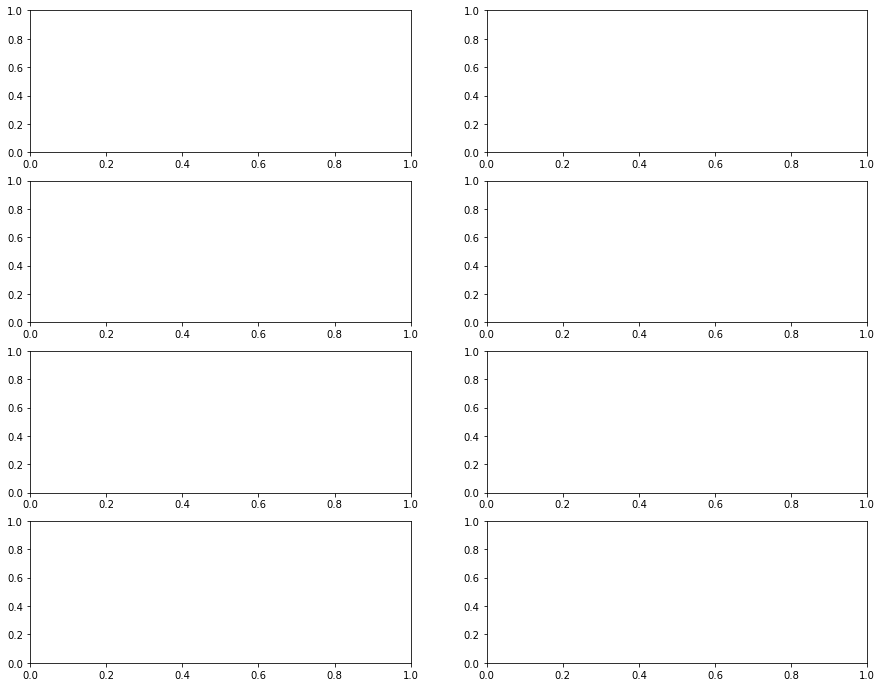

In [20]:
fig_pco2, axarr_pco2 = plt.subplots(nrows = 4, ncols = 2, figsize=[15,12])
ax_idx = 0
for name, ds_pco2 in dd_new_new.items():
    ax = axarr_pco2.flat[ax_idx]
    ds_pco2 = ds_pco2.isel(time=slice(0, 239)).sel(x=slice(180,200)).mean(['time', 'x'],keep_attrs=True)
#     if 'member_id' in ds_pco2.dims:
#         if name == 'CMIP.MRI.MRI-ESM2-0.historical.Omon.gr':
#             ds_pco2 = ds_pco2.isel(member_id=1)
#         elif name == 'CMIP.NCAR.CESM2.historical.Omon.gr':
#             ds_pco2 = ds_pco2.isel(member_id=2)
#         else:
#             ds_pco2 = ds_pco2.isel(member_id=0)
    sigma2 = calc_sigma2(ds_pco2)
    ax.contour()
    ax_idx += 1

<ipython-input-8-595b2aae9907>:16: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax.pcolormesh(da['y'],da['lev'],da)
<ipython-input-8-595b2aae9907>:16: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax.pcolormesh(da['y'],da['lev'],da)
<ipython-input-8-595b2aae9907>:16: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pas

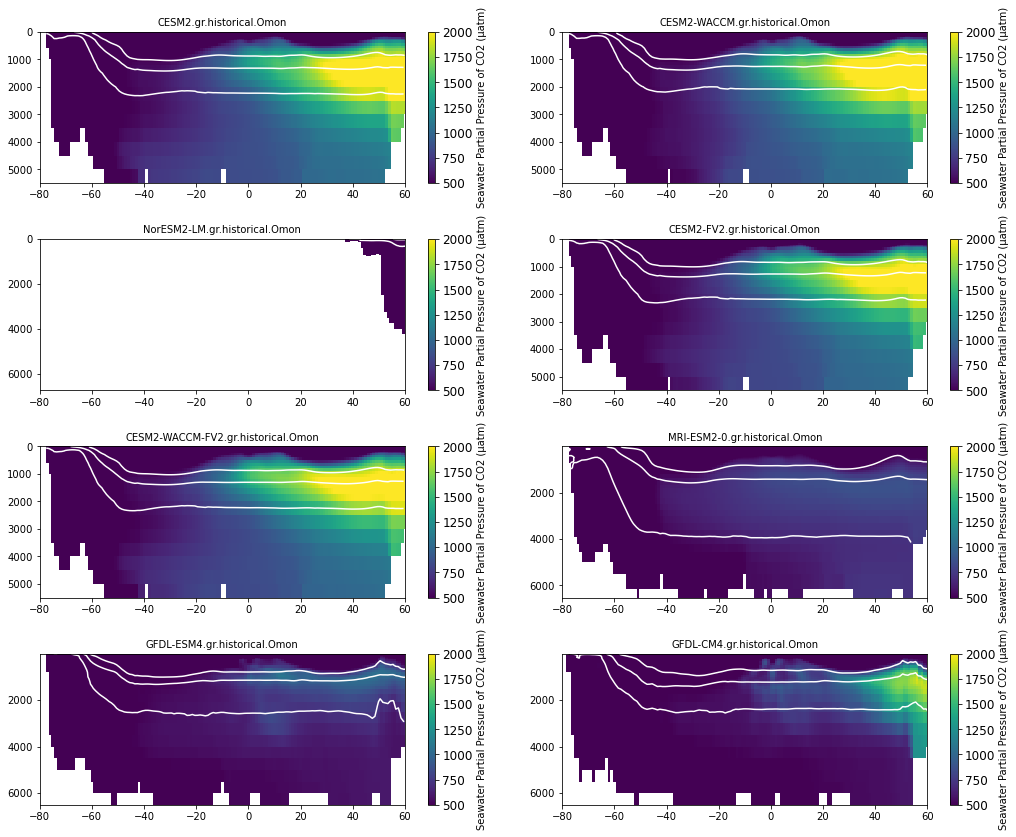

In [9]:
# fig, ax = plt.subplots(figsize=[10,3])
# ds = dset_dict['CMIP.NOAA-GFDL.GFDL-ESM4.historical.Omon.gr'].isel(time=0).sel(x=slice(180,200)).mean('x',keep_attrs=True)
# if 'member_id' in ds.dims:
#     ds = ds.isel(member_id=0)
# pco2 = calc_PpCO2(ds)
# #sigma2 = calc_sigma2(ds)
# meridionalsection(ax,pco2,clims=[0,1000],title=ds.attrs['intake_esm_dataset_key'])

#You dont have to spell out all the axes, you can just keep them in an array
fig_pco2, axarr_pco2 = plt.subplots(nrows = 4, ncols = 2, figsize=[15,12])
fig_pco2.tight_layout(pad = 3.5)
plt.rc('font', size = 12)
plt.rc('axes', titlesize= 10)    
plt.rc('axes', labelsize= 10)
plt.rc('figure', titlesize=14)

#loop over each key, value pair of the dictionary
ax_idx = 0 # index for your axes array
for name, ds_pco2 in dd_new_new.items():
    ax = axarr_pco2.flat[ax_idx]
    ds_pco2 = ds_pco2.isel(time=slice(0, 239)).sel(x=slice(180,200)).mean(['time', 'x'],keep_attrs=True)
#     if 'member_id' in ds_pco2.dims:
#         if name == 'CMIP.MRI.MRI-ESM2-0.historical.Omon.gr':
#             ds_pco2 = ds_pco2.isel(member_id=1)
#         elif name == 'CMIP.NCAR.CESM2.historical.Omon.gr':
#             ds_pco2 = ds_pco2.isel(member_id=2)
#         else:
#             ds_pco2 = ds_pco2.isel(member_id=0)
    pco2 = calc_PpCO2(ds_pco2)
    sigma2 = calc_sigma2(ds_pco2)
    meridionalsection_with_sigma2(ax,pco2,sigma2, clims=[500,2000],title=name)
    ax_idx += 1 # this is a nifty python trick to increment a variable by one

# for name, ds_pco2 in dset_dict.items():
#     ds_pco2 = ds_pco2.isel(time=0).sel(x=slice(180,200)).mean('x',keep_attrs=True)
#     if 'member_id' in ds_pco2.dims:
#         if name == 'CMIP.NCAR.CESM2.historical.Omon.gr':
#             ds_pco2 = ds_pco2.isel(member_id=2)
#             pco2 = calc_PpCO2(ds_pco2)
#             print(pco2)



maybe zoom in on southern ocean for the ppco2 slice to get more differnee in colorbars

delta_pco2 is ppco2 - 400 which is atm co2

<xarray.DataArray 'talk' (member_id: 11, lev: 33, y: 180)>
array([[[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        ...,
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan]],

       [[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,       

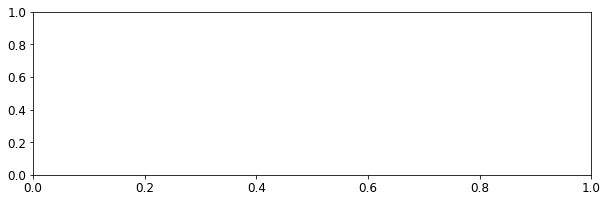

In [39]:
fig, ax = plt.subplots(figsize=[10,3])
ds = dset_dict['CMIP.NCAR.CESM2.historical.Omon.gr'].isel(time=0).sel(x=slice(180,200)).mean('x',keep_attrs=True)
p = gsw.p_from_z(-1*ds['lev'], ds['y'], geo_strf_dyn_height=0, sea_surface_geopotential=0)
insitutemp = gsw.t_from_CT(ds['so'], ds['thetao'], p)
results = pyco2.sys(par1=ds['talk']*1035.0,par2=ds['dissic']*1035.0,par1_type=1,par2_type=2,
                        pressure_out=0, temperature_out = ds['thetao'], pressure = p, 
                        temperature = insitutemp)
print(ds['talk'].copy(data=results['pCO2_out']))
# if 'member_id' in ds.dims:
#     ds = ds.isel(member_id=0)
# pco2 = calc_PpCO2(ds)
# #sigma2 = calc_sigma2(ds)
# meridionalsection(ax,pco2,clims=[0,1000],title=ds.attrs['intake_esm_dataset_key'])

#### I'm not sure why pressure is only being calculated for the first depth and none of the others

In [10]:
ds = dset_dict['CMIP.NOAA-GFDL.GFDL-ESM4.historical.Omon.gr'].isel(time=0).sel(x=slice(180,200)).mean('x',keep_attrs=True)
p = gsw.p_from_z(-1*ds['lev'], ds['y'], geo_strf_dyn_height=0, sea_surface_geopotential=0)
p

<xarray.DataArray 'lev' (lev: 35, y: 180)>
array([[2.52714941e+00, 2.52714125e+00, 2.52712495e+00, ...,
        2.52712495e+00, 2.52714125e+00, 2.52714941e+00],
       [1.01087837e+01, 1.01087511e+01, 1.01086859e+01, ...,
        1.01086859e+01, 1.01087511e+01, 1.01087837e+01],
       [2.02180635e+01, 2.02179983e+01, 2.02178679e+01, ...,
        2.02178679e+01, 2.02179983e+01, 2.02180635e+01],
       ...,
       [5.63244231e+03, 5.63242392e+03, 5.63238717e+03, ...,
        5.63238717e+03, 5.63242392e+03, 5.63244231e+03],
       [6.15144542e+03, 6.15142532e+03, 6.15138514e+03, ...,
        6.15138514e+03, 6.15142532e+03, 6.15144542e+03],
       [6.67156355e+03, 6.67154172e+03, 6.67149810e+03, ...,
        6.67149810e+03, 6.67154172e+03, 6.67156355e+03]])
Coordinates:
  * lev      (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
    time     int64 0
  * y        (y) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5

#### Obvi this result is unreliable as long as p is wrong

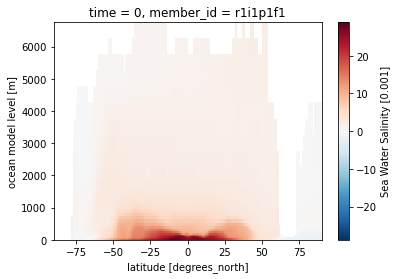

In [18]:
ds = dset_dict['CMIP.NOAA-GFDL.GFDL-ESM4.historical.Omon.gr'].isel(time=0).sel(x=slice(180,200)).mean('x',keep_attrs=True)
insitutemp = gsw.t_from_CT(ds['so'], ds['thetao'], p)
insitutemp.plot()

In [17]:
dd_new_new['CESM2-FV2.gr.historical.Omon']

<xarray.Dataset>
Dimensions:        (bnds: 2, lev: 33, time: 1980, vertex: 4, x: 360, y: 180)
Coordinates: (12/14)
  * y              (y) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    lat_bounds     (y, bnds, x) float64 dask.array<chunksize=(180, 2, 360), meta=np.ndarray>
  * lev            (lev) float64 0.0 10.0 20.0 30.0 ... 4.5e+03 5e+03 5.5e+03
    lev_bounds     (lev, bnds) float64 dask.array<chunksize=(33, 2), meta=np.ndarray>
  * x              (x) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
    lon_bounds     (x, bnds, y) float64 dask.array<chunksize=(360, 2, 180), meta=np.ndarray>
    ...             ...
  * bnds           (bnds) int64 0 1
    lon            (x, y) float64 0.5 0.5 0.5 0.5 ... 359.5 359.5 359.5 359.5
    lat            (x, y) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
    lon_verticies  (vertex, x, y) float64 dask.array<chunksize=(1, 360, 180), meta=np.ndarray>
    lat_verticies  (vertex, x, y) float64 dask.array<chunksize=(1, 360, 180), meta=np.ndarray>
  * vertex         (vertex) int64 0 1 2 3
Data variables:
    thetao         (time, lev, y, x) float32 dask.array<chunksize=(5, 33, 180, 360), meta=np.ndarray>
    so             (time, lev, y, x) float32 dask.array<chunksize=(5, 33, 180, 360), meta=np.ndarray>
    talk           (time, lev, y, x) float32 dask.array<chunksize=(5, 33, 180, 360), meta=np.ndarray>
    dissic         (time, lev, y, x) float32 dask.array<chunksize=(5, 33, 180, 360), meta=np.ndarray>
Attributes: (12/43)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   674885.0
    branch_time_in_parent:  10950.0
    case_id:                1559
    ...                     ...
    sub_experiment_id:      none
    table_id:               Omon
    variant_info:           CMIP6 CESM2-FV2 historical experiment (1850-2014)...
    variant_label:          r1i1p1f1
    version_id:             v20191120
    intake_esm_varname:     None

In [21]:
ax_idx = 0 # index for your axes array
for name, ds_pco2 in dd_new_new.items():
    ds_pco2 = ds_pco2.isel(time=1200, lev = 0)
#     if 'member_id' in ds_pco2.dims:
#         if name == 'CMIP.MRI.MRI-ESM2-0.historical.Omon.gr':
#             ds_pco2 = ds_pco2.isel(member_id=1)
#         elif name == 'CMIP.NCAR.CESM2.historical.Omon.gr':
#             ds_pco2 = ds_pco2.isel(member_id=2)
#         else:
#             ds_pco2 = ds_pco2.isel(member_id=0)
#     pco2 = calc_PpCO2(ds_pco2)
    print(ds_pco2)

<xarray.Dataset>
Dimensions:        (bnds: 2, vertex: 4, x: 360, y: 180)
Coordinates: (12/14)
  * y              (y) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    lat_bounds     (y, bnds, x) float64 dask.array<chunksize=(180, 2, 360), meta=np.ndarray>
    lev            float64 0.0
    lev_bounds     (bnds) float64 dask.array<chunksize=(2,), meta=np.ndarray>
  * x              (x) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
    lon_bounds     (x, bnds, y) float64 dask.array<chunksize=(360, 2, 180), meta=np.ndarray>
    ...             ...
  * bnds           (bnds) int64 0 1
    lon            (x, y) float64 0.5 0.5 0.5 0.5 ... 359.5 359.5 359.5 359.5
    lat            (x, y) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
    lon_verticies  (vertex, x, y) float64 dask.array<chunksize=(1, 360, 180), meta=np.ndarray>
    lat_verticies  (vertex, x, y) float64 dask.array<chunksize=(1, 360, 180), meta=np.ndarray>
  * vertex         (vertex) int64 0 1 2 3
Data v

In [9]:
ds = dd_new_new['CESM2-FV2.gr.historical.Omon'].isel(time=1200).sel(x=slice(180,200)).mean('x',keep_attrs=True)
out = calc_PpCO2(ds)
out

/srv/conda/envs/notebook/lib/python3.8/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


<xarray.DataArray 'talk' (lev: 33, y: 180)>
array([[         nan,          nan,          nan, ..., 309.44352178,
        309.50128487, 309.3143347 ],
       [         nan,          nan,          nan, ..., 309.44460043,
        309.50219954, 309.31686714],
       [         nan,          nan,          nan, ..., 309.44678642,
        309.50517289, 309.31860388],
       ...,
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan]])
Coordinates:
  * y        (y) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lev      (lev) float64 0.0 10.0 20.0 30.0 ... 4e+03 4.5e+03 5e+03 5.5e+03
    time     object 1950-01-15 12:00:00
Attributes: (12/19)
    cell_measures:  area: areacello volume: volcello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    description:    total alkalinity equivalent concentration (including carb...
    frequency:      mon
    id:             talk
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Total Alkalinity
    type:           real
    units:          mol m-3
    variable_id:    talk

In [42]:
ds = dd_new_new['CESM2-FV2.gr.historical.Omon'].isel(time=1200)
out = calc_PpCO2(ds)
out

PyCO2SYS error: input shapes cannot be broadcast together.


AttributeError: 'NoneType' object has no attribute 'keys'

In [11]:
ds_1 = dd_new_new['CESM2-FV2.gr.historical.Omon'].isel(time=1200).sel(x=slice(180,200)).mean('x',keep_attrs=True)


<xarray.DataArray 'dissic' (lev: 33, y: 180)>
dask.array<mean_agg-aggregate, shape=(33, 180), dtype=float32, chunksize=(33, 180), chunktype=numpy.ndarray>
Coordinates:
  * y        (y) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lev      (lev) float64 0.0 10.0 20.0 30.0 ... 4e+03 4.5e+03 5e+03 5.5e+03
    time     object 1950-01-15 12:00:00
Attributes: (12/19)
    cell_measures:  area: areacello volume: volcello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    description:    Dissolved inorganic carbon (CO3+HCO3+H2CO3) concentration
    frequency:      mon
    id:             dissic
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Dissolved Inorganic Carbon Concentration
    type:           real
    units:          mol m-3
    variable_id:    dissic

In [12]:
ds_1.dissic

<xarray.DataArray 'dissic' (lev: 33, y: 180)>
dask.array<mean_agg-aggregate, shape=(33, 180), dtype=float32, chunksize=(33, 180), chunktype=numpy.ndarray>
Coordinates:
  * y        (y) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lev      (lev) float64 0.0 10.0 20.0 30.0 ... 4e+03 4.5e+03 5e+03 5.5e+03
    time     object 1950-01-15 12:00:00
Attributes: (12/19)
    cell_measures:  area: areacello volume: volcello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    description:    Dissolved inorganic carbon (CO3+HCO3+H2CO3) concentration
    frequency:      mon
    id:             dissic
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Dissolved Inorganic Carbon Concentration
    type:           real
    units:          mol m-3
    variable_id:    dissic

In [13]:
ds_1.talk

<xarray.DataArray 'talk' (lev: 33, y: 180)>
dask.array<mean_agg-aggregate, shape=(33, 180), dtype=float32, chunksize=(33, 180), chunktype=numpy.ndarray>
Coordinates:
  * y        (y) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lev      (lev) float64 0.0 10.0 20.0 30.0 ... 4e+03 4.5e+03 5e+03 5.5e+03
    time     object 1950-01-15 12:00:00
Attributes: (12/19)
    cell_measures:  area: areacello volume: volcello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    description:    total alkalinity equivalent concentration (including carb...
    frequency:      mon
    id:             talk
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Total Alkalinity
    type:           real
    units:          mol m-3
    variable_id:    talk

In [17]:
ds_2 = dd_new_new['CESM2-FV2.gr.historical.Omon'].isel(time=1200, lev = 0)
ds_2

<xarray.Dataset>
Dimensions:        (bnds: 2, vertex: 4, x: 360, y: 180)
Coordinates: (12/14)
  * y              (y) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    lat_bounds     (y, bnds, x) float64 dask.array<chunksize=(180, 2, 360), meta=np.ndarray>
    lev            float64 0.0
    lev_bounds     (bnds) float64 dask.array<chunksize=(2,), meta=np.ndarray>
  * x              (x) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
    lon_bounds     (x, bnds, y) float64 dask.array<chunksize=(360, 2, 180), meta=np.ndarray>
    ...             ...
  * bnds           (bnds) int64 0 1
    lon            (x, y) float64 0.5 0.5 0.5 0.5 ... 359.5 359.5 359.5 359.5
    lat            (x, y) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
    lon_verticies  (vertex, x, y) float64 dask.array<chunksize=(1, 360, 180), meta=np.ndarray>
    lat_verticies  (vertex, x, y) float64 dask.array<chunksize=(1, 360, 180), meta=np.ndarray>
  * vertex         (vertex) int64 0 1 2 3
Data variables:
    dissic         (y, x) float32 dask.array<chunksize=(180, 360), meta=np.ndarray>
    so             (y, x) float32 dask.array<chunksize=(180, 360), meta=np.ndarray>
    talk           (y, x) float32 dask.array<chunksize=(180, 360), meta=np.ndarray>
    thetao         (y, x) float32 dask.array<chunksize=(180, 360), meta=np.ndarray>
Attributes: (12/43)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   674885.0
    branch_time_in_parent:  10950.0
    case_id:                1559
    ...                     ...
    sub_experiment_id:      none
    table_id:               Omon
    variant_info:           CMIP6 CESM2-FV2 historical experiment (1850-2014)...
    variant_label:          r1i1p1f1
    version_id:             v20191120
    intake_esm_varname:     None

In [26]:
ds_2.dissic

<xarray.DataArray 'dissic' (y: 180, x: 360)>
dask.array<getitem, shape=(180, 360), dtype=float32, chunksize=(180, 360), chunktype=numpy.ndarray>
Coordinates:
  * y        (y) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
    lev      float64 0.0
  * x        (x) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
    time     object 1950-01-15 12:00:00
    lon      (x, y) float64 0.5 0.5 0.5 0.5 0.5 ... 359.5 359.5 359.5 359.5
    lat      (x, y) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
Attributes: (12/19)
    cell_measures:  area: areacello volume: volcello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    description:    Dissolved inorganic carbon (CO3+HCO3+H2CO3) concentration
    frequency:      mon
    id:             dissic
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Dissolved Inorganic Carbon Concentration
    type:           real
    units:          mol m-3
    variable_id:    dissic

In [27]:
ds_2.thetao

<xarray.DataArray 'thetao' (y: 180, x: 360)>
dask.array<getitem, shape=(180, 360), dtype=float32, chunksize=(180, 360), chunktype=numpy.ndarray>
Coordinates:
  * y        (y) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
    lev      float64 0.0
  * x        (x) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
    time     object 1950-01-15 12:00:00
    lon      (x, y) float64 0.5 0.5 0.5 0.5 0.5 ... 359.5 359.5 359.5 359.5
    lat      (x, y) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
Attributes: (12/19)
    cell_measures:  area: areacello volume: volcello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    description:    Diagnostic should be contributed even for models using co...
    frequency:      mon
    id:             thetao
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Sea Water Potential Temperature
    type:           real
    units:          degC
    variable_id:    thetao

In [28]:
ds_2.so

<xarray.DataArray 'so' (y: 180, x: 360)>
dask.array<getitem, shape=(180, 360), dtype=float32, chunksize=(180, 360), chunktype=numpy.ndarray>
Coordinates:
  * y        (y) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
    lev      float64 0.0
  * x        (x) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
    time     object 1950-01-15 12:00:00
    lon      (x, y) float64 0.5 0.5 0.5 0.5 0.5 ... 359.5 359.5 359.5 359.5
    lat      (x, y) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
Attributes: (12/19)
    cell_measures:  area: areacello volume: volcello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    description:    Sea water salinity is the salt content of sea water, ofte...
    frequency:      mon
    id:             so
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Sea Water Salinity
    type:           real
    units:          0.001
    variable_id:    so

In [29]:
ds_2.talk

<xarray.DataArray 'talk' (y: 180, x: 360)>
dask.array<getitem, shape=(180, 360), dtype=float32, chunksize=(180, 360), chunktype=numpy.ndarray>
Coordinates:
  * y        (y) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
    lev      float64 0.0
  * x        (x) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
    time     object 1950-01-15 12:00:00
    lon      (x, y) float64 0.5 0.5 0.5 0.5 0.5 ... 359.5 359.5 359.5 359.5
    lat      (x, y) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
Attributes: (12/19)
    cell_measures:  area: areacello volume: volcello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    description:    total alkalinity equivalent concentration (including carb...
    frequency:      mon
    id:             talk
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Total Alkalinity
    type:           real
    units:          mol m-3
    variable_id:    talk

```
ds_2 = dd_new_new['CESM2-FV2.gr.historical.Omon'].isel(time=1200)
ds_2
```
`Dimensions: bnds: 2, lev: 33, vertex: 4, x: 360, y: 180`

```
ds_1 = dd_new_new['CESM2-FV2.gr.historical.Omon'].isel(time=1200).sel(x=slice(180,200)).mean('x',keep_attrs=True)
ds_1
```

`Dimensions: bnds: 2, lev: 33, vertex: 4, y: 180`

In [15]:
p_1 = gsw.p_from_z(-1*ds_1['lev'], ds_1['y'], geo_strf_dyn_height=0, sea_surface_geopotential=0)
p_1

<xarray.DataArray 'lev' (lev: 33, y: 180)>
array([[   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [  10.10878369,   10.10875107,   10.10868588, ...,   10.10868588,
          10.10875107,   10.10878369],
       [  20.21806351,   20.21799827,   20.21786787, ...,   20.21786787,
          20.21799827,   20.21806351],
       ...,
       [4597.82290111, 4597.80791945, 4597.77797463, ..., 4597.77797463,
        4597.80791945, 4597.82290111],
       [5114.56464682, 5114.54796467, 5114.51462097, ..., 5114.51462097,
        5114.54796467, 5114.56464682],
       [5632.44231346, 5632.42392403, 5632.38716786, ..., 5632.38716786,
        5632.42392403, 5632.44231346]])
Coordinates:
  * lev      (lev) float64 0.0 10.0 20.0 30.0 ... 4e+03 4.5e+03 5e+03 5.5e+03
    time     object 1950-01-15 12:00:00
  * y        (y) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5

In [18]:
p_2 = gsw.p_from_z(-1*ds_2['lev'], ds_2['y'], geo_strf_dyn_height=0, sea_surface_geopotential=0)
p_2

<xarray.DataArray 'lev' (y: 180)>
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
Coordinates:
    lev      float64 0.0
    time     object 1950-01-15 12:00:00
  * y        (y) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5

In [16]:
insitutemp_1 = gsw.t_from_CT(ds_1['so'], ds_1['thetao'], p_1) 
insitutemp_1


<xarray.DataArray 'so' (lev: 33, y: 180)>
dask.array<t_from_ct, shape=(33, 180), dtype=float64, chunksize=(33, 180), chunktype=numpy.ndarray>
Coordinates:
  * y        (y) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lev      (lev) float64 0.0 10.0 20.0 30.0 ... 4e+03 4.5e+03 5e+03 5.5e+03
    time     object 1950-01-15 12:00:00
Attributes: (12/19)
    cell_measures:  area: areacello volume: volcello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    description:    Sea water salinity is the salt content of sea water, ofte...
    frequency:      mon
    id:             so
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Sea Water Salinity
    type:           real
    units:          0.001
    variable_id:    so

In [19]:
insitutemp_2 = gsw.t_from_CT(ds_2['so'], ds_2['thetao'], p_2) 
insitutemp_2

<xarray.DataArray 'so' (y: 180, x: 360)>
dask.array<t_from_ct, shape=(180, 360), dtype=float64, chunksize=(180, 360), chunktype=numpy.ndarray>
Coordinates:
  * y        (y) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
    lev      float64 0.0
  * x        (x) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
    time     object 1950-01-15 12:00:00
    lon      (x, y) float64 0.5 0.5 0.5 0.5 0.5 ... 359.5 359.5 359.5 359.5
    lat      (x, y) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
Attributes: (12/19)
    cell_measures:  area: areacello volume: volcello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    description:    Sea water salinity is the salt content of sea water, ofte...
    frequency:      mon
    id:             so
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Sea Water Salinity
    type:           real
    units:          0.001
    variable_id:    so

In [17]:
conversion =  1e6/1035
results_1 = pyco2.sys(par1=ds_1.talk*conversion,par2=ds_1.dissic*conversion,par1_type=1,par2_type=2,
                    pressure_out=0, temperature_out = ds_1.thetao, pressure = p_1, 
                    temperature = insitutemp_1)
results_1

{'par1': array([[          nan,           nan,           nan, ..., 2126.87329102,
         2127.9831543 , 2129.75488281],
        [          nan,           nan,           nan, ..., 2126.87329102,
         2127.98339844, 2129.75537109],
        [          nan,           nan,           nan, ..., 2126.87475586,
         2127.98535156, 2129.75805664],
        ...,
        [          nan,           nan,           nan, ...,           nan,
                   nan,           nan],
        [          nan,           nan,           nan, ...,           nan,
                   nan,           nan],
        [          nan,           nan,           nan, ...,           nan,
                   nan,           nan]]),
 'par1_type': array([[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]]),
 'par2': array([[          nan,           nan,           nan, ..., 

In [20]:
conversion =  1e6/1035
results_2 = pyco2.sys(par1=ds_2.talk*conversion,par2=ds_2.dissic*conversion,par1_type=1,par2_type=2,
                    pressure_out=0, temperature_out = ds_2.thetao, pressure = p_2, 
                    temperature = insitutemp_2)
results_2

PyCO2SYS error: input shapes cannot be broadcast together.


AttributeError: 'NoneType' object has no attribute 'keys'

In [18]:
ds_1['talk'].copy(data=results_1['pCO2_out'])

<xarray.DataArray 'talk' (lev: 33, y: 180)>
array([[         nan,          nan,          nan, ..., 309.44352178,
        309.50128487, 309.3143347 ],
       [         nan,          nan,          nan, ..., 309.44460043,
        309.50219954, 309.31686714],
       [         nan,          nan,          nan, ..., 309.44678642,
        309.50517289, 309.31860388],
       ...,
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan]])
Coordinates:
  * y        (y) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lev      (lev) float64 0.0 10.0 20.0 30.0 ... 4e+03 4.5e+03 5e+03 5.5e+03
    time     object 1950-01-15 12:00:00
Attributes: (12/19)
    cell_measures:  area: areacello volume: volcello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    description:    total alkalinity equivalent concentration (including carb...
    frequency:      mon
    id:             talk
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Total Alkalinity
    type:           real
    units:          mol m-3
    variable_id:    talk

NameError: name 'results_1' is not defined